In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Conv1D, Conv2D, Dense, Dropout, MaxPooling1D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad, SGD, RMSprop
# from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [79]:
df = pd.read_csv("sensor-nodes.csv")
df.head(10)


,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-2023 00:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-2023 00:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-2023 00:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-2023 00:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-2023 00:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0
5,6,01-02-2023 00:05,192.168.230.20,42.539308,1.777329,1.226797,140.306629,-48.164891,22.562783,80.792853,...,3,9.100424,10.912167,17.039896,17.098904,0.095630,41.592922,37.011924,135.173141,0
6,7,01-02-2023 00:06,192.168.201.178,34.371305,2.122728,1.238309,82.759149,-46.749541,22.199859,83.896476,...,5,5.514884,9.764031,14.729525,14.537270,0.112991,51.911647,33.413317,113.722314,0
7,8,01-02-2023 00:07,192.168.0.73,39.421713,1.632756,1.070672,128.744279,-47.965449,22.017101,73.018853,...,3,8.785059,7.424502,14.028956,16.584326,0.150733,43.373535,32.514071,101.301618,0
8,9,01-02-2023 00:08,192.168.35.14,64.392638,1.771348,0.614431,105.554913,-45.030005,19.406187,100.505321,...,4,9.652375,9.578266,20.649000,13.220874,0.133769,41.662683,36.024818,130.214575,0
9,10,01-02-2023 00:09,192.168.94.186,71.586404,2.874885,1.175556,109.901877,-43.949902,27.354364,76.642262,...,3,8.413089,14.570255,15.308871,14.962364,0.088105,39.467362,31.086755,130.360976,0


In [80]:
X = df.drop(columns=['Node_ID', 'Timestamp', 'IP_Address', 'Is_Malicious'])
y = df['Is_Malicious']


In [81]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [82]:
# LSTM
X_train_val_lstm, X_test_lstm, y_train_val_lstm, y_test_lstm = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(
    X_train_val_lstm, y_train_val_lstm, test_size=0.25, random_state=42)

print("Shape of X_train:", X_train_lstm.shape)
print("Shape of X_val:", X_val_lstm.shape)
print("Shape of X_test:", X_test_lstm.shape)
print("Shape of y_train:", y_train_lstm.shape)
print("Shape of y_val:", y_val_lstm.shape)
print("Shape of y_test:", y_test_lstm.shape)


Shape of X_train: (6000, 17)
Shape of X_val: (2000, 17)
Shape of X_test: (2000, 17)
Shape of y_train: (6000,)
Shape of y_val: (2000,)
Shape of y_test: (2000,)


In [83]:
sequence_length = X_train_lstm.shape[1]
num_features = 1

X_train_reshaped_lstm = np.expand_dims(X_train_lstm, axis=-1)
X_val_reshaped_lstm = np.expand_dims(X_val_lstm, axis=-1)
X_test_reshaped_lstm = np.expand_dims(X_test_lstm, axis=-1)

print("Sequence length: ", sequence_length)
print("Num of features: ", num_features)


Sequence length:  17
Num of features:  1


In [84]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=64, input_shape=(sequence_length, num_features),
               kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
lstm_model.add(Dropout(0.5))


In [85]:
# Adam Optimizer
lstm_adam_optimizer = Adam(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_adam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_adam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                   epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30


188/188 [==============================] - 3s 7ms/step - loss: 0.4937 - accuracy: 0.1633 - val_loss: 0.0772 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.4032 - accuracy: 0.3590 - val_loss: 0.0401 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3920 - accuracy: 0.4185 - val_loss: 0.0354 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3894 - accuracy: 0.4360 - val_loss: 0.0207 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3798 - accuracy: 0.4207 - val_loss: 0.0199 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3841 - accuracy: 0.4567 - val_loss: 0.0179 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3818 - accuracy: 0.4370 - val_loss: 0.0134 - val_accuracy: 

In [87]:
lstm_nadam_optimizer = Nadam(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_nadam_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_nadam_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 8s 18ms/step - loss: 0.3805 - accuracy: 0.3895 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 3s 14ms/step - loss: 0.3812 - accuracy: 0.3492 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 2s 9ms/step - loss: 0.3844 - accuracy: 0.4148 - val_loss: 0.0112 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 2s 10ms/step - loss: 0.3795 - accuracy: 0.4477 - val_loss: 0.0106 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 2s 11ms/step - loss: 0.3783 - accuracy: 0.4510 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 3s 14ms/step - loss: 0.3759 - accuracy: 0.4600 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 3s 15ms/step - loss: 0.3842 - accuracy: 0.4575 - val_loss: 0.0094

In [88]:
lstm_adagrad_optimizer = Adagrad(learning_rate=0.001)
lstm_model.compile(optimizer=lstm_adagrad_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])
lstm_adagrad_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm,
                                      epochs=30, batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 2s 7ms/step - loss: 0.3839 - accuracy: 0.4758 - val_loss: 0.0099 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3793 - accuracy: 0.4733 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3791 - accuracy: 0.4590 - val_loss: 0.0093 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3823 - accuracy: 0.4680 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3783 - accuracy: 0.4628 - val_loss: 0.0091 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3799 - accuracy: 0.4787 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3804 - accuracy: 0.4763 - val_loss: 0.0089 - val

In [89]:
lstm_sgd_optimizer = SGD(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_sgd_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_sgd_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 2s 7ms/step - loss: 0.3816 - accuracy: 0.4755 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3800 - accuracy: 0.4790 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3778 - accuracy: 0.4807 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3809 - accuracy: 0.4797 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3791 - accuracy: 0.4735 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3792 - accuracy: 0.4752 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3856 - accuracy: 0.4727 - val_loss: 0.0086 - val

In [90]:
lstm_rms_optimizer = RMSprop(learning_rate=0.001)

lstm_model.compile(optimizer=lstm_rms_optimizer,
                   loss='binary_crossentropy', metrics=['accuracy'])

lstm_rms_history = lstm_model.fit(X_train_reshaped_lstm, y_train_lstm, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_lstm, y_val_lstm))


Epoch 1/30
188/188 [==============================] - 2s 7ms/step - loss: 0.3816 - accuracy: 0.4725 - val_loss: 0.0094 - val_accuracy: 0.0000e+00
Epoch 2/30
188/188 [==============================] - 1s 5ms/step - loss: 0.3840 - accuracy: 0.4722 - val_loss: 0.0125 - val_accuracy: 0.0000e+00
Epoch 3/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.4712 - val_loss: 0.0086 - val_accuracy: 0.0000e+00
Epoch 4/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3826 - accuracy: 0.4452 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 5/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3833 - accuracy: 0.4738 - val_loss: 0.0108 - val_accuracy: 0.0000e+00
Epoch 6/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.4687 - val_loss: 0.0154 - val_accuracy: 0.0000e+00
Epoch 7/30
188/188 [==============================] - 1s 6ms/step - loss: 0.3807 - accuracy: 0.4552 - val_loss: 0.0091 - val

In [91]:
lstm_loss, lstm_accuracy = lstm_model.evaluate(
    X_test_reshaped_lstm, y_test_lstm)
print("Test LSTM Loss: ", lstm_loss)
print("Test LSTM Accuracy: ", lstm_accuracy)


63/63 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.0000e+00
Test LSTM Loss:  0.007385207340121269
Test LSTM Accuracy:  0.0


In [153]:
lstm_probs = lstm_model.predict(X_test_reshaped_lstm, verbose=0)
lstm_classes = (lstm_model.predict(
    X_test_reshaped_lstm, verbose=0) > 0.5).astype("int32")

lstm_probs = lstm_probs[:, 0]
lstm_classes = lstm_classes[:, 0]

lstm_accuracy = accuracy_score(y_test_lstm, lstm_classes)
print("Accuracy: ", lstm_accuracy)

lstm_precision = precision_score(y_test_lstm, lstm_classes)
print("Precision: ", lstm_precision)

lstm_recall = recall_score(y_test_lstm, lstm_classes)
print("Recall: ", lstm_recall)

# f1_score_value = f1_score(y_test_lstm, lstm_classes)
# print("F1 score: ", f1_score_value)


Accuracy:  1.0
Precision:  1.0
Recall:  1.0


In [92]:
# GRU
X_train_gru, X_temp_gru, y_train_gru, y_temp_gru = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_gru, X_test_gru, y_val_gru, y_test_gru = train_test_split(
    X_temp_gru, y_temp_gru, test_size=0.5, random_state=42)

X_train_reshaped_gru = X_train_gru.reshape(-1, 1, X_train_gru.shape[1])
X_val_reshaped_gru = X_val_gru.reshape(-1, 1, X_val_gru.shape[1])
X_test_reshaped_gru = X_test_gru.reshape(-1, 1, X_test_gru.shape[1])


In [93]:
gru_model = Sequential()
gru_model.add(GRU(units=64, input_shape=(
    X_train_reshaped_gru.shape[1], X_train_reshaped_gru.shape[2]), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
gru_model.add(Dropout(0.5))


In [94]:
gru_adam_optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=gru_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.6356 - accuracy: 0.0144 - val_loss: 0.1789 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.0951 - val_loss: 0.1522 - val_accuracy: 0.0000e+00
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.1991 - val_loss: 0.1418 - val_accuracy: 6.6667e-04
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4619 - accuracy: 0.2761 - val_loss: 0.1378 - val_accuracy: 6.6667e-04
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.3173 - val_loss: 0.1333 - val_accuracy: 0.0000e+00
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4567 - accuracy: 0.3364 - val_loss: 0.1312 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.3479 - val_loss: 0.1304 - val_acc

In [95]:
gru_nadam_optimizer = Nadam(learning_rate=0.001)
gru_model.compile(optimizer=gru_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_nadam_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 3s 5ms/step - loss: 0.4518 - accuracy: 0.4490 - val_loss: 0.1205 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4468 - accuracy: 0.4443 - val_loss: 0.1196 - val_accuracy: 6.6667e-04
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.4447 - val_loss: 0.1201 - val_accuracy: 0.0027
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4488 - accuracy: 0.4499 - val_loss: 0.1188 - val_accuracy: 0.0033
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.4431 - val_loss: 0.1186 - val_accuracy: 6.6667e-04
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.4421 - val_loss: 0.1204 - val_accuracy: 0.0020
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4446 - accuracy: 0.4459 - val_loss: 0.1200 - val_accuracy: 0.000

In [96]:
gru_adagrad_optimizer = Adagrad(learning_rate=0.001)
gru_model.compile(optimizer=gru_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_adagrad_history = gru_model.fit(X_train_reshaped_gru, y_train_gru,
                                    epochs=30, batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4494 - accuracy: 0.4301 - val_loss: 0.1196 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4476 - accuracy: 0.4376 - val_loss: 0.1196 - val_accuracy: 0.0013
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.4384 - val_loss: 0.1195 - val_accuracy: 0.0020
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.4474 - val_loss: 0.1195 - val_accuracy: 0.0027
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.4480 - val_loss: 0.1195 - val_accuracy: 0.0027
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.4433 - val_loss: 0.1195 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.4541 - val_loss: 0.1195 - val_accuracy: 0.0013
Epoch 

In [97]:
gru_sgd_optimizer = SGD(learning_rate=0.001)

gru_model.compile(optimizer=gru_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_sgd_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4463 - accuracy: 0.4460 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.4519 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.4456 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.4620 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.4586 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4483 - accuracy: 0.4447 - val_loss: 0.1194 - val_accuracy: 0.0013
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.4503 - val_loss: 0.1194 - val_accuracy: 0.0020
Epoch 

In [98]:
gru_rms_optimizer = RMSprop(learning_rate=0.001)

gru_model.compile(optimizer=gru_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

gru_rms_history = gru_model.fit(X_train_reshaped_gru, y_train_gru, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_gru, y_val_gru))


Epoch 1/30
219/219 [==============================] - 2s 3ms/step - loss: 0.4441 - accuracy: 0.4379 - val_loss: 0.1225 - val_accuracy: 0.0000e+00
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.4501 - val_loss: 0.1226 - val_accuracy: 0.0033
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.4510 - val_loss: 0.1215 - val_accuracy: 6.6667e-04
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.4436 - val_loss: 0.1212 - val_accuracy: 0.0000e+00
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.4436 - val_loss: 0.1218 - val_accuracy: 0.0053
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.4381 - val_loss: 0.1203 - val_accuracy: 6.6667e-04
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.4561 - val_loss: 0.1206 - val_accurac

In [99]:
gru_loss, gru_accuracy = gru_model.evaluate(X_test_reshaped_gru, y_test_gru)
print("Test GRU Loss: ", gru_loss)
print("Test GRU Accuracy: ", gru_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.0133
Test GRU Loss:  0.12843754887580872
Test GRU Accuracy:  0.013333333656191826


In [152]:
gru_probs = gru_model.predict(X_test_reshaped_gru, verbose=0)
gru_classes = (gru_model.predict(
    X_test_reshaped_gru, verbose=0) > 0.5).astype("int32")

gru_probs = gru_probs[:, 0]
gru_classes = gru_classes[:, 0]

gru_accuracy = accuracy_score(y_test_gru, gru_classes)
print("Accuracy: ", gru_accuracy)

gru_precision = precision_score(y_test_gru, gru_classes)
print("Precision: ", gru_precision)

gru_recall = recall_score(y_test_gru, gru_classes)
print("Recall: ", gru_recall)

# f1_score_value = f1_score(y_test_gru, gru_classes)
# print("F1 score: ", f1_score_value)


Accuracy:  0.9693333333333334
Precision:  1.0
Recall:  0.34285714285714286


In [100]:
# CNN
X_train_cnn, X_temp_cnn, y_train_cnn, y_temp_cnn = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

X_val_cnn, X_test_cnn, y_val_cnn, y_test_cnn = train_test_split(
    X_temp_cnn, y_temp_cnn, test_size=0.5, random_state=42)

print("Shape of X_train:", X_train_cnn.shape)

sequence_length = X_train_cnn.shape[1]
num_features = 1

X_train_reshaped_cnn = X_train_cnn.reshape(-1, sequence_length, num_features)
X_val_reshaped_cnn = X_val_cnn.reshape(-1, sequence_length, num_features)
X_test_reshaped_cnn = X_test_cnn.reshape(-1, sequence_length, num_features)


Shape of X_train: (7000, 17)


In [101]:
cnn_model = Sequential()

cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(
    sequence_length, num_features), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Conv1D(filters=32, kernel_size=3, activation="relu"))

cnn_model.add(MaxPooling1D(pool_size=2))

cnn_model.add(Flatten())

cnn_model.add(Dense(128, activation="relu"))

cnn_model.add(Dropout(0.5))


In [102]:
cnn_adam_optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                 batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.5624 - accuracy: 0.1400 - val_loss: 0.2580 - val_accuracy: 0.5040
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.6107 - val_loss: 0.2464 - val_accuracy: 0.7967
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.8664 - val_loss: 0.2408 - val_accuracy: 0.8707
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.9056 - val_loss: 0.2381 - val_accuracy: 0.9007
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.9190 - val_loss: 0.2366 - val_accuracy: 0.9233
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5210 - accuracy: 0.9219 - val_loss: 0.2353 - val_accuracy: 0.9460
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.9269 - val_loss: 0.2328 - val_accuracy: 0.9313
Epoch 

In [103]:
cnn_nadam_optimizer = Nadam(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_nadam_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_nadam_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                  batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 3ms/step - loss: 0.4956 - accuracy: 0.9399 - val_loss: 0.1943 - val_accuracy: 0.9100
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4963 - accuracy: 0.9421 - val_loss: 0.1965 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.9456 - val_loss: 0.1950 - val_accuracy: 0.9520
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.9456 - val_loss: 0.1948 - val_accuracy: 0.9527
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4950 - accuracy: 0.9461 - val_loss: 0.1947 - val_accuracy: 0.9547
Epoch 6/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4964 - accuracy: 0.9467 - val_loss: 0.1958 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.9460 - val_loss: 0.1960 - val_accuracy: 0.9553
Epoch 

In [104]:
cnn_adagrad_optimizer = Adagrad(learning_rate=0.001)
cnn_model.compile(optimizer=cnn_adagrad_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])
cnn_adagrad_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                    batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4921 - accuracy: 0.9489 - val_loss: 0.1881 - val_accuracy: 0.9547
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.9490 - val_loss: 0.1883 - val_accuracy: 0.9547
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.9496 - val_loss: 0.1883 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.9496 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4934 - accuracy: 0.9496 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.9497 - val_loss: 0.1885 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4900 - accuracy: 0.9497 - val_loss: 0.1885 - val_accuracy: 0.9553
Epoch 

In [105]:
cnn_sgd_optimizer = SGD(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_sgd_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_sgd_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4914 - accuracy: 0.9497 - val_loss: 0.1885 - val_accuracy: 0.9553
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.9497 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.9497 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.9497 - val_loss: 0.1885 - val_accuracy: 0.9553
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.9497 - val_loss: 0.1885 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4943 - accuracy: 0.9497 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.9497 - val_loss: 0.1884 - val_accuracy: 0.9553
Epoch 

In [106]:
cnn_rms_optimizer = RMSprop(learning_rate=0.001)

cnn_model.compile(optimizer=cnn_rms_optimizer,
                  loss='binary_crossentropy', metrics=['accuracy'])

cnn_rms_history = cnn_model.fit(X_train_reshaped_cnn, y_train_cnn, epochs=30,
                                batch_size=32, validation_data=(X_val_reshaped_cnn, y_val_cnn))


Epoch 1/30
219/219 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.9464 - val_loss: 0.1908 - val_accuracy: 0.9540
Epoch 2/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.9464 - val_loss: 0.1922 - val_accuracy: 0.9553
Epoch 3/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.9476 - val_loss: 0.1912 - val_accuracy: 0.9533
Epoch 4/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.9466 - val_loss: 0.1882 - val_accuracy: 0.9380
Epoch 5/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.9469 - val_loss: 0.1947 - val_accuracy: 0.9553
Epoch 6/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.9457 - val_loss: 0.1896 - val_accuracy: 0.9527
Epoch 7/30
219/219 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.9467 - val_loss: 0.1933 - val_accuracy: 0.9553
Epoch 

In [107]:
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_reshaped_cnn, y_test_cnn)
print("Test CNN Loss: ", cnn_loss)
print("Test CNN Accuracy: ", cnn_accuracy)


47/47 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9533
Test CNN Loss:  0.20344839990139008
Test CNN Accuracy:  0.95333331823349


In [151]:
cnn_probs = cnn_model.predict(X_test_reshaped_cnn, verbose=0)
cnn_classes = (cnn_model.predict(
    X_test_reshaped_cnn, verbose=0) > 0.5).astype("int32")

cnn_probs = cnn_probs[:, 0]
cnn_classes = cnn_classes[:, 0]

cnn_accuracy = accuracy_score(y_test_cnn, cnn_classes)
print("Accuracy: ", cnn_accuracy)

cnn_precision = precision_score(y_test_cnn, cnn_classes)
print("Precision: ", cnn_precision)

cnn_recall = recall_score(y_test_cnn, cnn_classes)
print("Recall: ", cnn_recall)

# f1_score_value = f1_score(y_test_cnn, cnn_classes)
# print("F1 score: ", f1_score_value)


Accuracy:  0.998
Precision:  1.0
Recall:  0.9571428571428572


In [108]:
# cnn_model_2D = Sequential()

# cnn_model_2D.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu",
#                  input_shape=(sequence_length, num_features, 1), kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

# # cnn_model_2D.add(Conv2D(64, (3, 3), activation="relu"))

# cnn_model_2D.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
# cnn_model_2D.add(MaxPooling2D(pool_size=(2, 2)))

# cnn_model_2D.add(Dropout(0.25))
# # cnn_model_2D.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model_2D.add(Flatten())
# cnn_model_2D.add(Dense(128, activation="relu"))

# cnn_model_2D.add(Dropout(0.5))


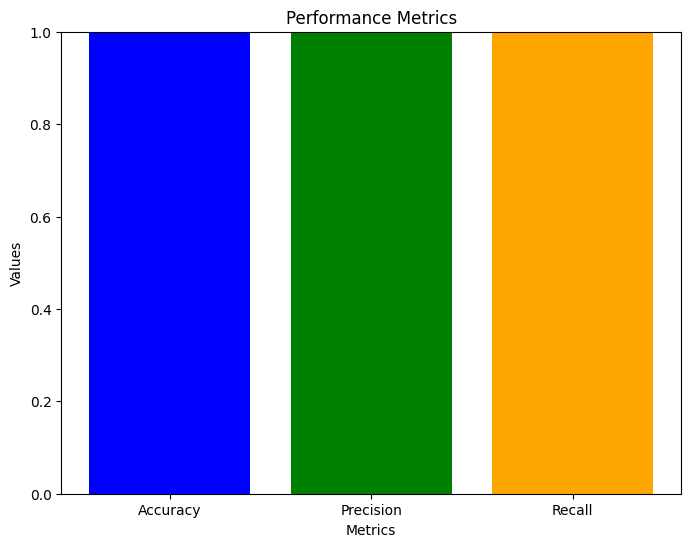

In [154]:
metrics = ['Accuracy', 'Precision', 'Recall']
lstm_values = [lstm_accuracy, lstm_precision, lstm_recall]

plt.figure(figsize=(8, 6))
plt.bar(metrics, lstm_values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


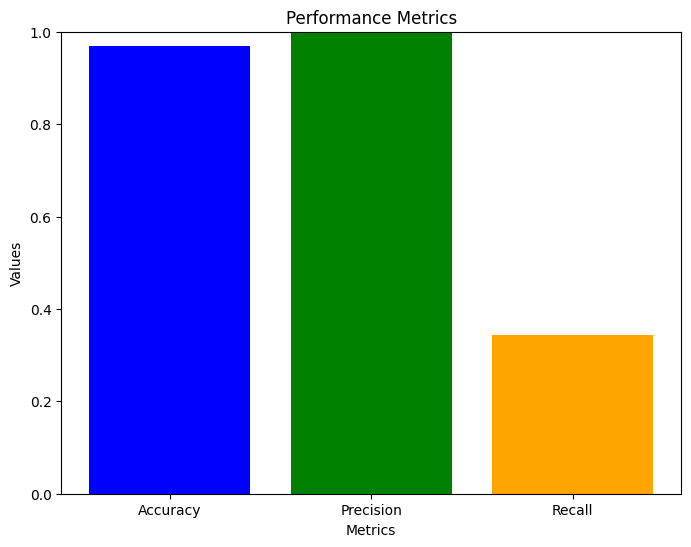

In [155]:
gru_values = [gru_accuracy, gru_precision, gru_recall]

plt.figure(figsize=(8, 6))
plt.bar(metrics, gru_values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


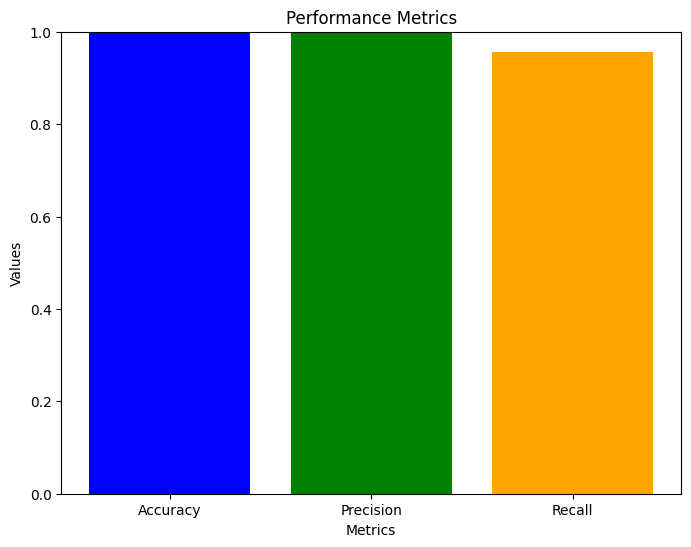

In [156]:
cnn_values = [cnn_accuracy, cnn_precision, cnn_recall]

plt.figure(figsize=(8, 6))
plt.bar(metrics, cnn_values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics')
plt.ylim(0, 1)
plt.show()


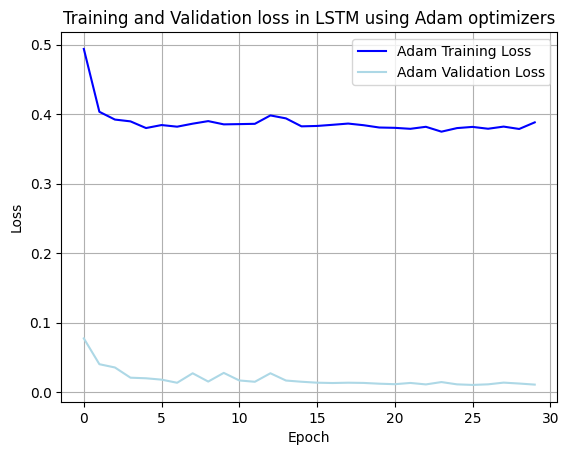

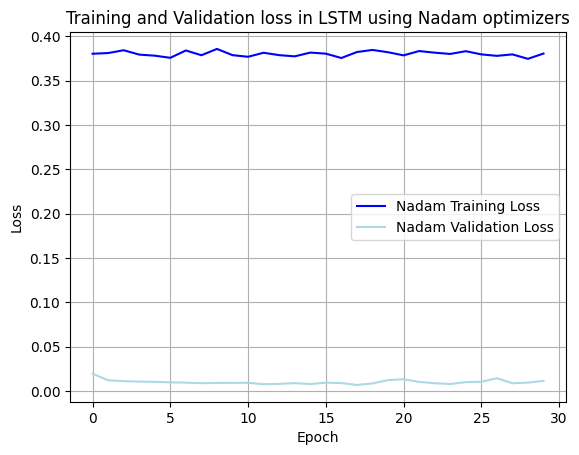

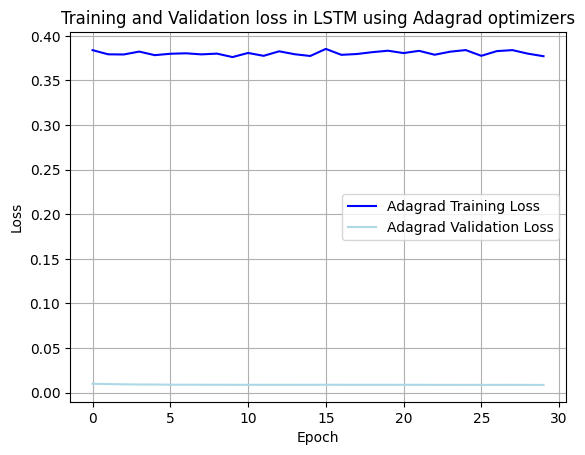

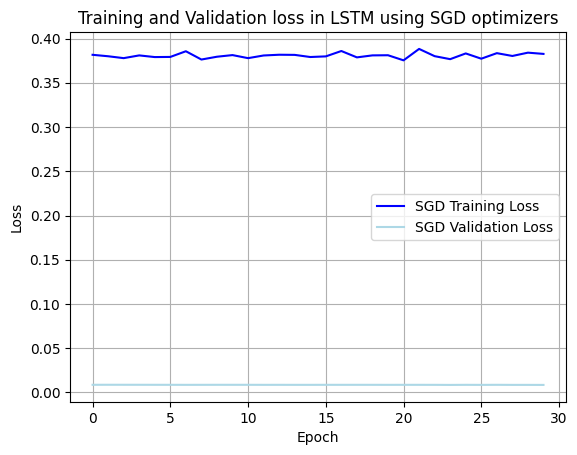

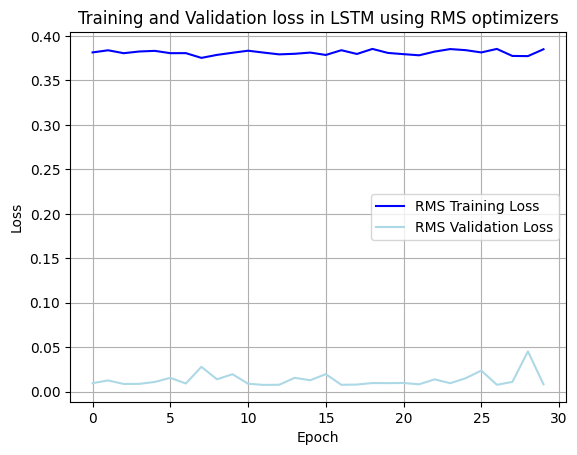

In [109]:
# ----- LSTM Adam Loss -----
plt.plot(lstm_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(lstm_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Loss -----
plt.plot(lstm_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(lstm_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Loss -----
plt.plot(lstm_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(lstm_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Loss -----
plt.plot(lstm_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(lstm_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Loss -----
plt.plot(lstm_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(lstm_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


# plt.figure(figsize=(12, 6))

# lstm_adam_h = np.mean(lstm_adam_history.history['loss'])
# lstm_nadam_h = np.mean(lstm_nadam_history.history['loss'])
# lstm_adagrad_h = np.mean(lstm_adagrad_history.history['loss'])
# lstm_sgd_h = np.mean(lstm_sgd_history.history['loss'])
# lstm_rms_h = np.mean(lstm_rms_history.history['loss'])


# lstm_optimizers = [lstm_adam_h, lstm_nadam_h,
#                    lstm_adagrad_h, lstm_sgd_h, lstm_rms_h]

# plt.plot(lstm_optimizers, label="Loss", color='blue')
# # plt.plot(lstm_optimizers, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in LSTM")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


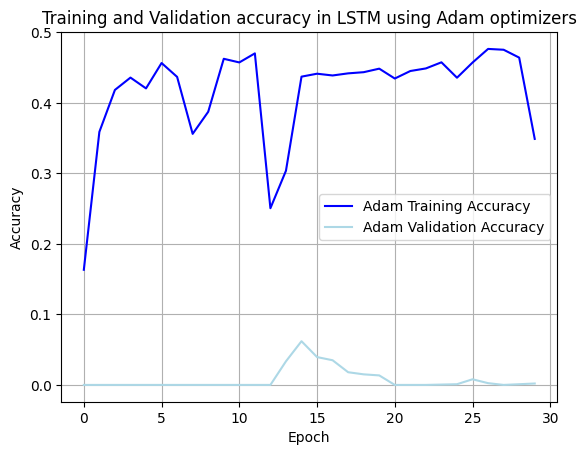

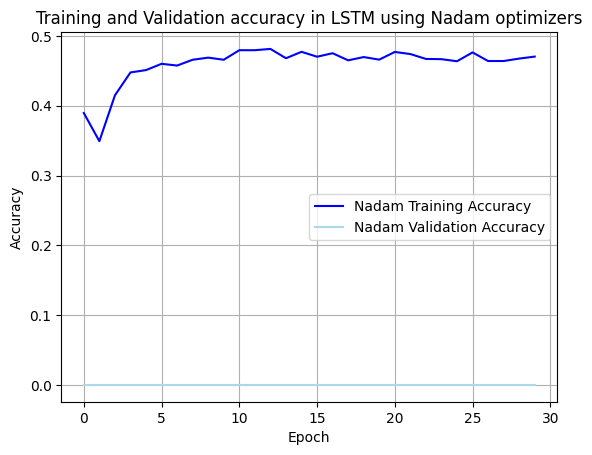

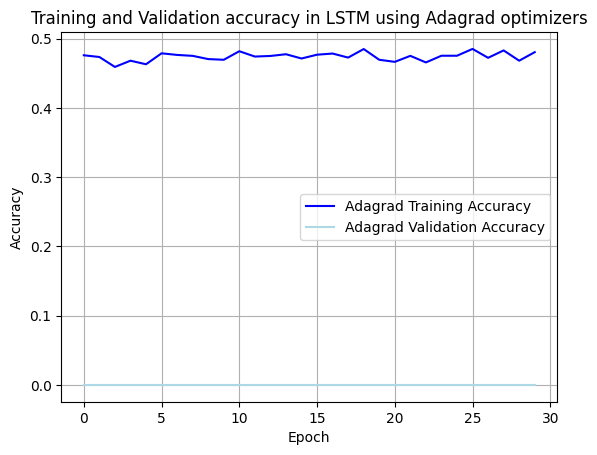

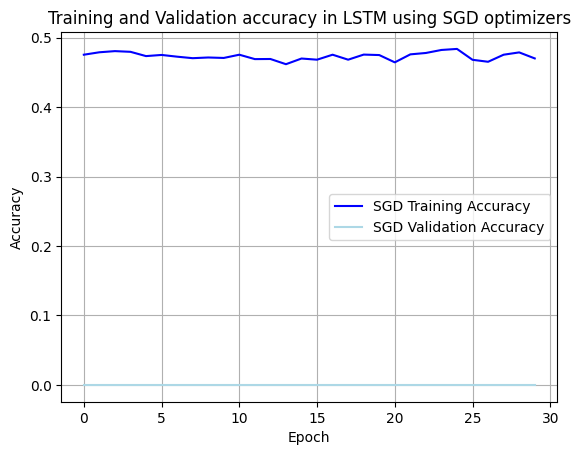

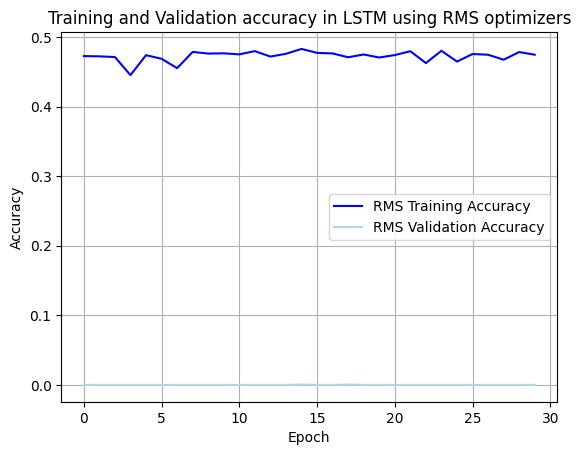

In [110]:
# ----- LSTM Adam Accuracy -----
plt.plot(lstm_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(lstm_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Nadam Accuracy -----
plt.plot(lstm_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(lstm_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM Adgrad Accuracy -----
plt.plot(lstm_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(lstm_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM SGD Accuracy -----
plt.plot(lstm_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(lstm_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- LSTM RMSProp Accuracy -----
plt.plot(lstm_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(lstm_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in LSTM using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


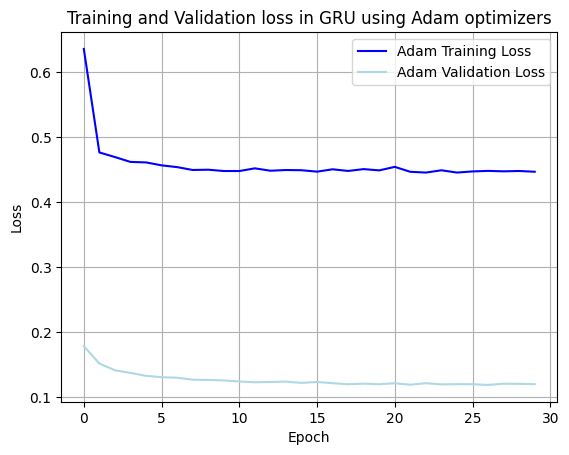

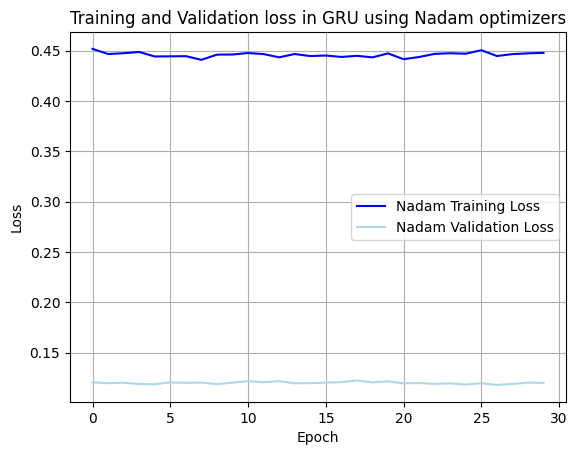

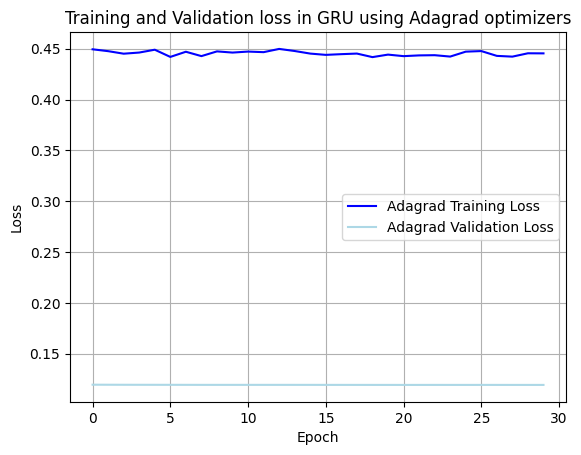

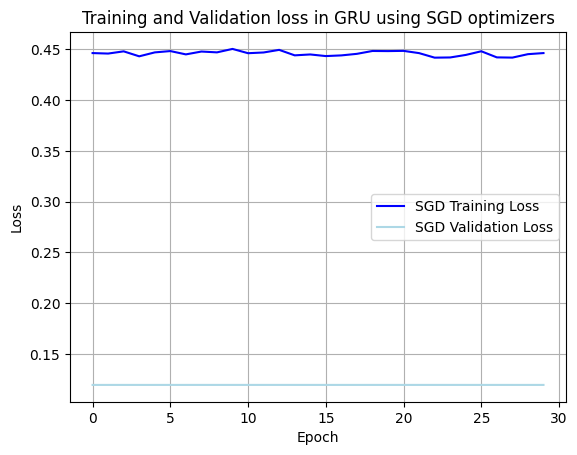

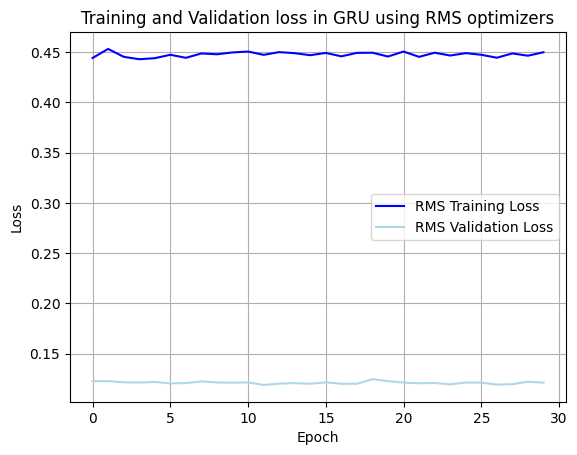

In [111]:
# ----- GRU Adam Loss -----
plt.plot(gru_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(gru_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Loss -----
plt.plot(gru_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(gru_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Loss -----
plt.plot(gru_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(gru_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Loss -----
plt.plot(gru_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(gru_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Loss -----
plt.plot(gru_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(gru_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


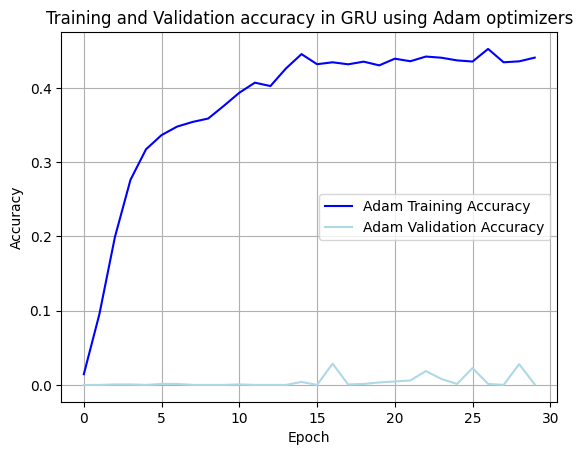

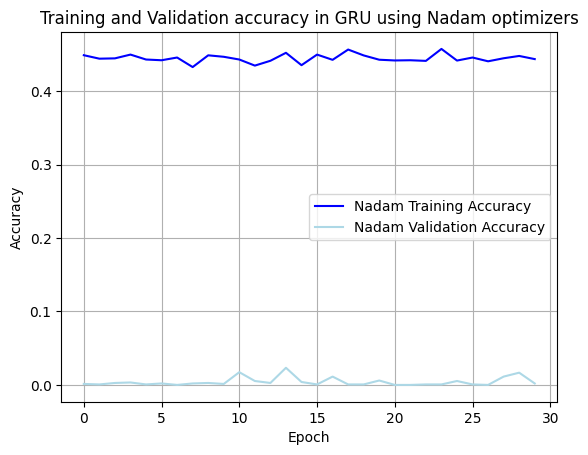

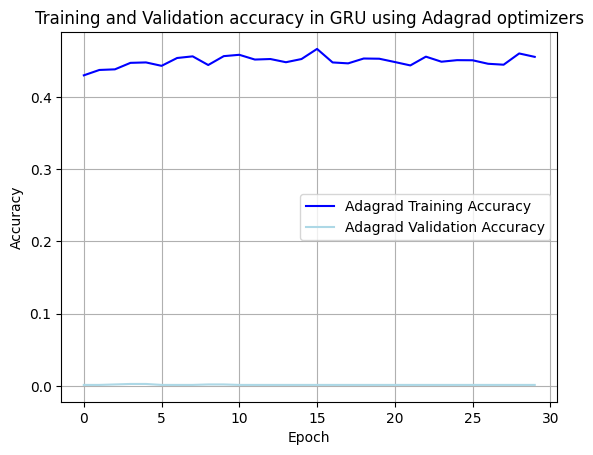

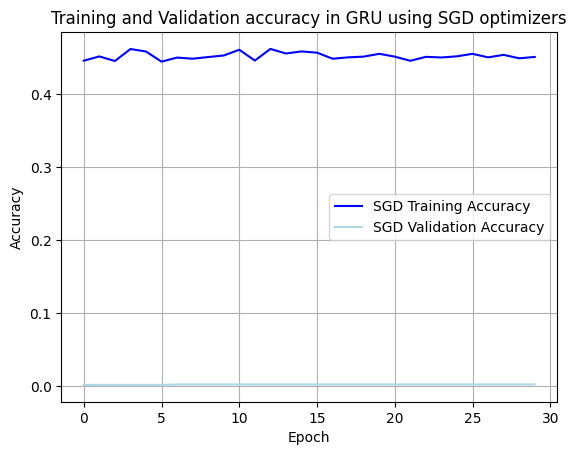

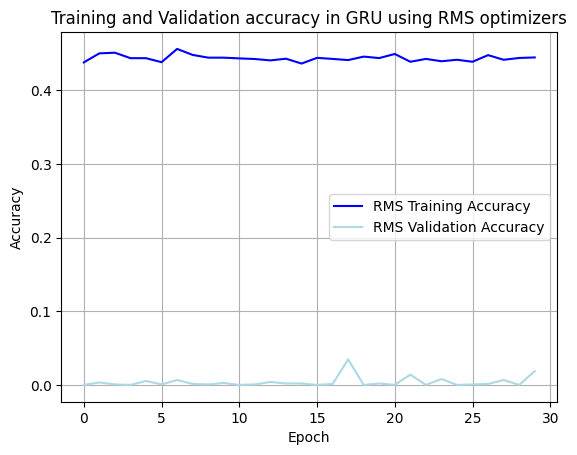

In [112]:
# ----- GRU Adam Accuracy -----
plt.plot(gru_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(gru_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Nadam Accuracy -----
plt.plot(gru_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(gru_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU Adgrad Accuracy -----
plt.plot(gru_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(gru_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU SGD Accuracy -----
plt.plot(gru_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(gru_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- GRU RMSProp Accuracy -----
plt.plot(gru_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(gru_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in GRU using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


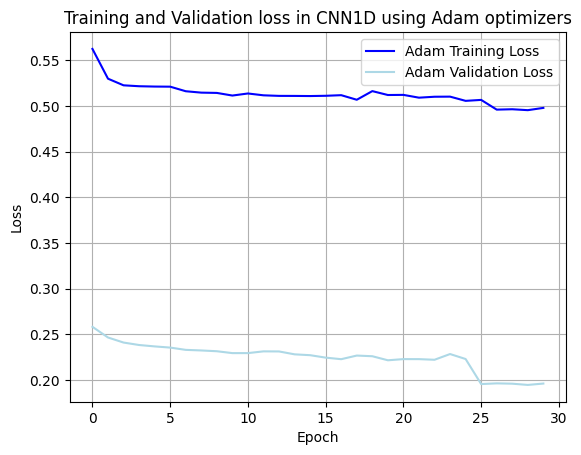

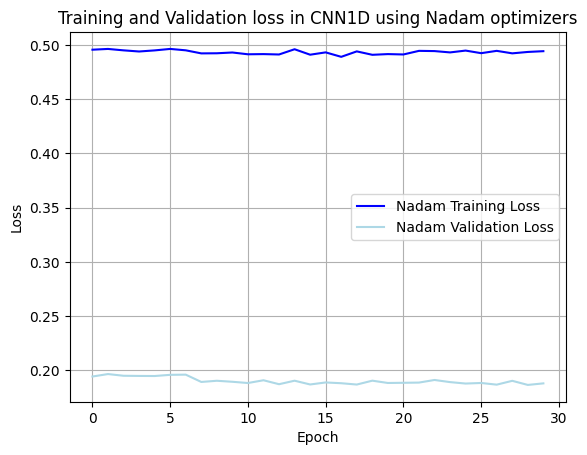

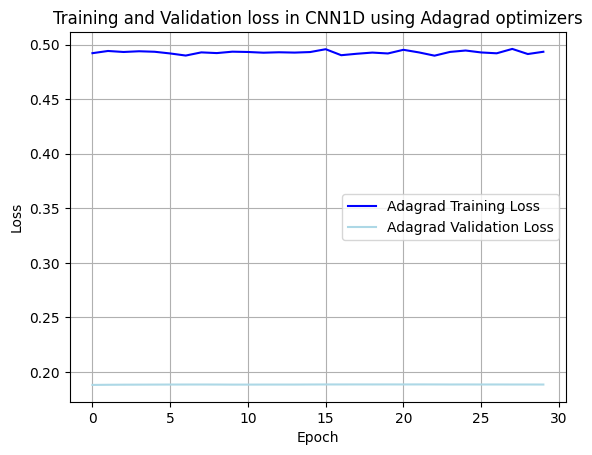

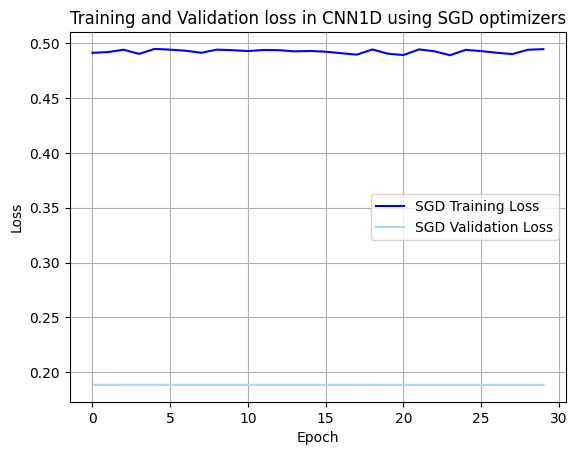

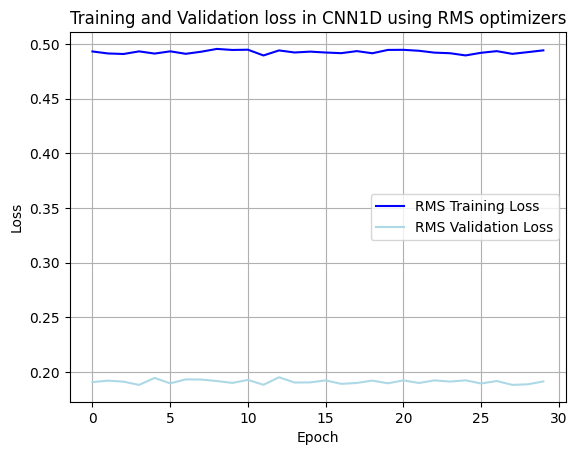

In [113]:
# ----- CNN1D Adam Loss -----
plt.plot(cnn_adam_history.history['loss'],
         label="Adam Training Loss", color='blue')
plt.plot(cnn_adam_history.history['val_loss'],
         label="Adam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Nadam Loss -----
plt.plot(cnn_nadam_history.history['loss'],
         label="Nadam Training Loss", color='blue')
plt.plot(cnn_nadam_history.history['val_loss'],
         label="Nadam Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D Adgrad Loss -----
plt.plot(cnn_adagrad_history.history['loss'],
         label="Adagrad Training Loss", color='blue')
plt.plot(cnn_adagrad_history.history['val_loss'],
         label="Adagrad Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D SGD Loss -----
plt.plot(cnn_sgd_history.history['loss'],
         label="SGD Training Loss", color='blue')
plt.plot(cnn_sgd_history.history['val_loss'],
         label="SGD Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1D RMSProp Loss -----
plt.plot(cnn_rms_history.history['loss'],
         label="RMS Training Loss", color='blue')
plt.plot(cnn_rms_history.history['val_loss'],
         label="RMS Validation Loss", color='lightblue')

plt.title("Training and Validation loss in CNN1D using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


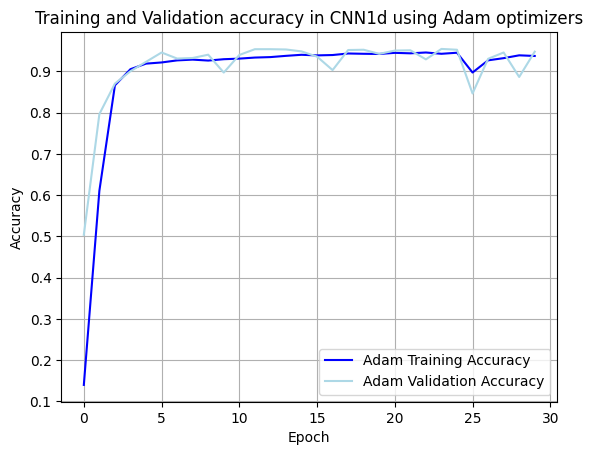

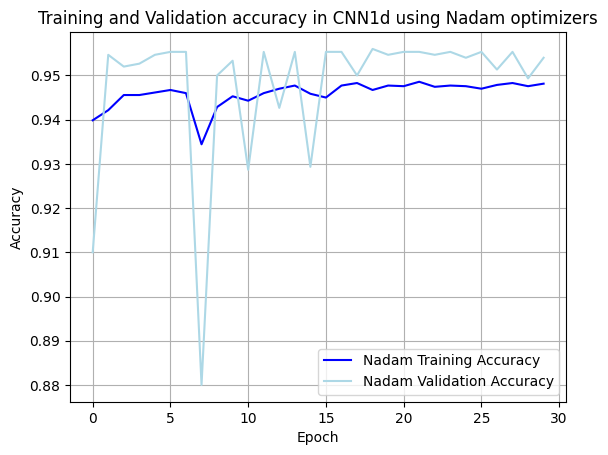

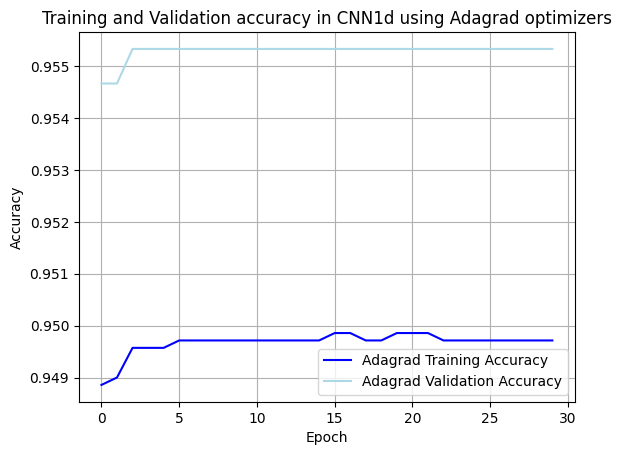

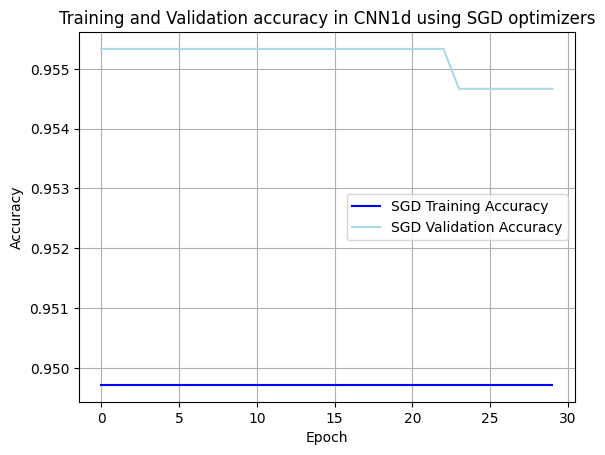

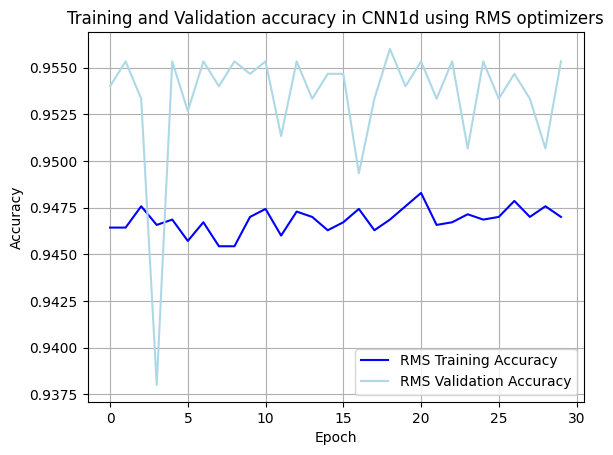

In [114]:
# ----- CNN1d Adam Accuracy -----
plt.plot(cnn_adam_history.history['accuracy'],
         label="Adam Training Accuracy", color='blue')
plt.plot(cnn_adam_history.history['val_accuracy'],
         label="Adam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Nadam Accuracy -----
plt.plot(cnn_nadam_history.history['accuracy'],
         label="Nadam Training Accuracy", color='blue')
plt.plot(cnn_nadam_history.history['val_accuracy'],
         label="Nadam Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Nadam optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d Adgrad Accuracy -----
plt.plot(cnn_adagrad_history.history['accuracy'],
         label="Adagrad Training Accuracy", color='blue')
plt.plot(cnn_adagrad_history.history['val_accuracy'],
         label="Adagrad Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using Adagrad optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d SGD Accuracy -----
plt.plot(cnn_sgd_history.history['accuracy'],
         label="SGD Training Accuracy", color='blue')
plt.plot(cnn_sgd_history.history['val_accuracy'],
         label="SGD Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using SGD optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# ----- CNN1d RMSProp Accuracy -----
plt.plot(cnn_rms_history.history['accuracy'],
         label="RMS Training Accuracy", color='blue')
plt.plot(cnn_rms_history.history['val_accuracy'],
         label="RMS Validation Accuracy", color='lightblue')

plt.title("Training and Validation accuracy in CNN1d using RMS optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [115]:
# plt.figure(figsize=(12, 6))

# cnn_adam_h = np.mean(cnn_adam_history.history['loss'])
# cnn_nadam_h = np.mean(cnn_nadam_history.history['loss'])
# cnn_adagrad_h = np.mean(cnn_adagrad_history.history['loss'])
# cnn_sgd_h = np.mean(cnn_sgd_history.history['loss'])
# cnn_rms_h = np.mean(cnn_rms_history.history['loss'])

# cnn_adam_h_v = np.mean(cnn_adam_history.history['val_loss'])
# cnn_nadam_h_v = np.mean(cnn_nadam_history.history['val_loss'])
# cnn_adagrad_h_v = np.mean(cnn_adagrad_history.history['val_loss'])
# cnn_sgd_h_v = np.mean(cnn_sgd_history.history['val_loss'])
# cnn_rms_h_v = np.mean(cnn_rms_history.history['val_loss'])

# cnn_optimizers = [cnn_adam_h, cnn_nadam_h,
#                   cnn_adagrad_h, cnn_sgd_h, cnn_rms_h]
# cnn_optimizers_v = [cnn_adam_h_v, cnn_nadam_h_v,
#                     cnn_adagrad_h_v, cnn_sgd_h_v, cnn_rms_h_v]

# plt.plot(cnn_optimizers, label="Loss", color='blue')
# plt.plot(cnn_optimizers_v, label="Validation Loss", color='lightblue')

# plt.title("Training and Validation loss in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.legend()
# plt.grid(True)
# plt.show()


In [116]:
# plt.figure(figsize=(12, 6))

# cnn_adam_acc = np.mean(cnn_adam_history.history['accuracy'])
# cnn_nadam_acc = np.mean(cnn_nadam_history.history['accuracy'])
# cnn_adagrad_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_sgd_acc = np.mean(cnn_sgd_history.history['accuracy'])
# cnn_rms_acc = np.mean(cnn_rms_history.history['accuracy'])

# cnn_adam_val_acc = np.mean(cnn_adam_history.history['val_accuracy'])
# cnn_nadam_val_acc = np.mean(cnn_nadam_history.history['val_accuracy'])
# cnn_adagrad_val_acc = np.mean(cnn_adagrad_history.history['val_accuracy'])
# cnn_sgd_val_acc = np.mean(cnn_sgd_history.history['val_accuracy'])
# cnn_rms_val_acc = np.mean(cnn_rms_history.history['val_accuracy'])


# cnn_optimizers_acc = [cnn_adam_acc, cnn_nadam_acc,
#                       cnn_adagrad_acc, cnn_sgd_acc, cnn_rms_acc]
# cnn_optimizers_val_acc = [cnn_adam_val_acc, cnn_nadam_val_acc,
#                           cnn_adagrad_val_acc, cnn_sgd_val_acc, cnn_rms_val_acc]

# plt.plot(cnn_optimizers_acc, label="Accuracy", color='blue')
# plt.plot(cnn_optimizers_val_acc, label="Validation Accuracy", color='lightblue')

# plt.title("Training and Validation accuracy in CNN1D")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.grid(True)
# plt.show()


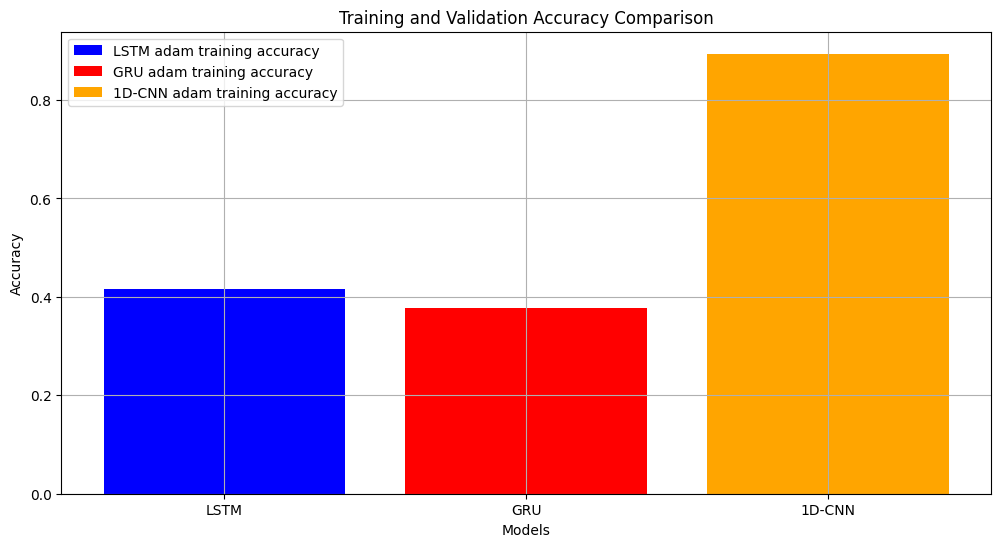

In [117]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_adam_history.history["accuracy"],
#          label="LSTM adam training accuracy", color='blue')
# plt.plot(lstm_adam_history.history["val_accuracy"],
#          label="LSTM adam validation accuracy", color='lightblue')

# plt.plot(gru_adam_history.history["accuracy"],
#          label="GRU adam training accuracy", color='green')
# plt.plot(gru_adam_history.history["val_accuracy"],
#          label="GRU adam validation accuracy", color='lightgreen')

# plt.plot(cnn_adam_history.history["accuracy"],
#          label="CNN adam training accuracy", color='orange')
# plt.plot(cnn_adam_history.history["val_accuracy"],
#          label="CNN adam validation accuracy", color='gold')

lstm_adam_train_acc = np.mean(lstm_adam_history.history["accuracy"])
# lstm_adam_val_acc = lstm_adam_history.history["val_accuracy"]

gru_adam_train_acc = np.mean(gru_adam_history.history["accuracy"])
# gru_adam_val_acc = gru_adam_history.history["val_accuracy"]

cnn_adam_train_acc = np.mean(cnn_adam_history.history["accuracy"])
# cnn_adam_val_acc = cnn_adam_history.history["val_accuracy"]

# epochs = range(1, len(lstm_adam_train_acc) + 1)
# print("epochs: ", epochs)
models = ['LSTM', 'GRU', '1D-CNN']
adam_accuracies = [lstm_adam_train_acc, gru_adam_train_acc, cnn_adam_train_acc]
# bar_width = 0.2

# plt.bar(epochs, lstm_adam_train_acc, width=bar_width,
#         label="LSTM adam training accuracy", color='blue')
# plt.bar([e + bar_width for e in epochs], lstm_adam_val_acc, width=bar_width, label="LSTM adam validation accuracy", color='lightblue')

plt.bar(models, adam_accuracies, label=['LSTM adam training accuracy',
        'GRU adam training accuracy', '1D-CNN adam training accuracy'], color=['blue', 'red', 'orange'])

# plt.bar([e + 1 * bar_width for e in epochs], gru_adam_train_acc,
#         width=bar_width, label="GRU adam training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_adam_train_acc,
#         width=bar_width, label="CNN adam training accuracy", color='orange')

plt.title("Training and Validation Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


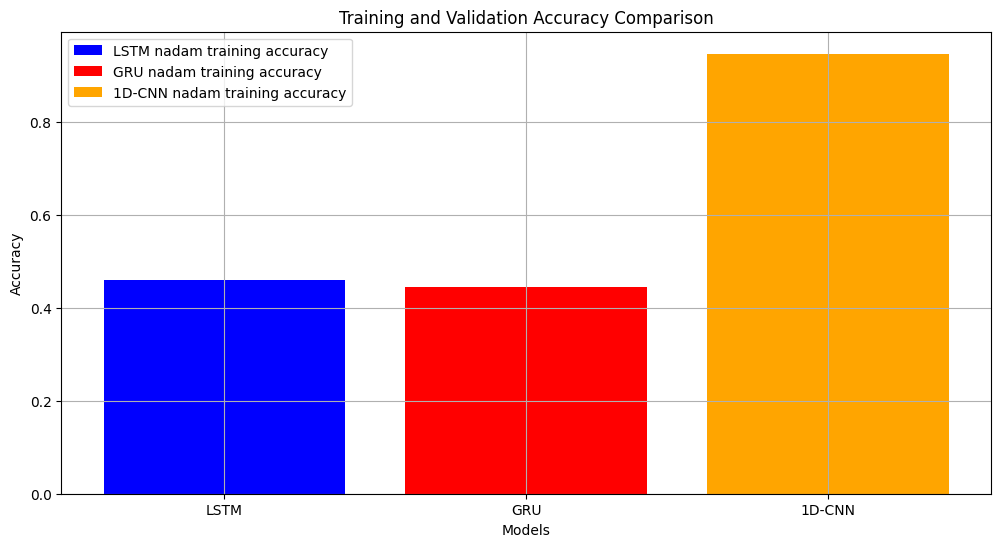

In [118]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_nadam_history.history["accuracy"],
#          label="LSTM nadam training accuracy", color='blue')
# plt.plot(lstm_nadam_history.history["val_accuracy"],
#          label="LSTM nadam validation accuracy", color='lightblue')

# plt.plot(gru_nadam_history.history["accuracy"],
#          label="GRU nadam training accuracy", color='green')
# plt.plot(gru_nadam_history.history["val_accuracy"],
#          label="GRU nadam validation accuracy", color='lightgreen')

# plt.plot(cnn_nadam_history.history["accuracy"],
#          label="CNN nadam training accuracy", color='orange')
# plt.plot(cnn_nadam_history.history["val_accuracy"],
#          label="CNN nadam validation accuracy", color='gold')

lstm_nadam_train_acc = np.mean(lstm_nadam_history.history["accuracy"])
# lstm_nadam_val_acc = lstm_nadam_history.history["val_accuracy"]

gru_nadam_train_acc = np.mean(gru_nadam_history.history["accuracy"])
# gru_nadam_val_acc = gru_nadam_history.history["val_accuracy"]

cnn_nadam_train_acc = np.mean(cnn_nadam_history.history["accuracy"])
# cnn_nadam_val_acc = cnn_nadam_history.history["val_accuracy"]

nadam_accuracies = [lstm_nadam_train_acc,
                    gru_nadam_train_acc, cnn_nadam_train_acc]

# plt.bar(epochs, lstm_nadam_train_acc, width=bar_width,
#         label="LSTM nadam training accuracy", color='blue')

# plt.bar([e + 1 * bar_width for e in epochs], gru_nadam_train_acc,
#         width=bar_width, label="GRU nadam training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_nadam_train_acc,
#         width=bar_width, label="CNN nadam training accuracy", color='orange')

plt.bar(models, nadam_accuracies, label=['LSTM nadam training accuracy',
        'GRU nadam training accuracy', '1D-CNN nadam training accuracy'], color=['blue', 'red', 'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


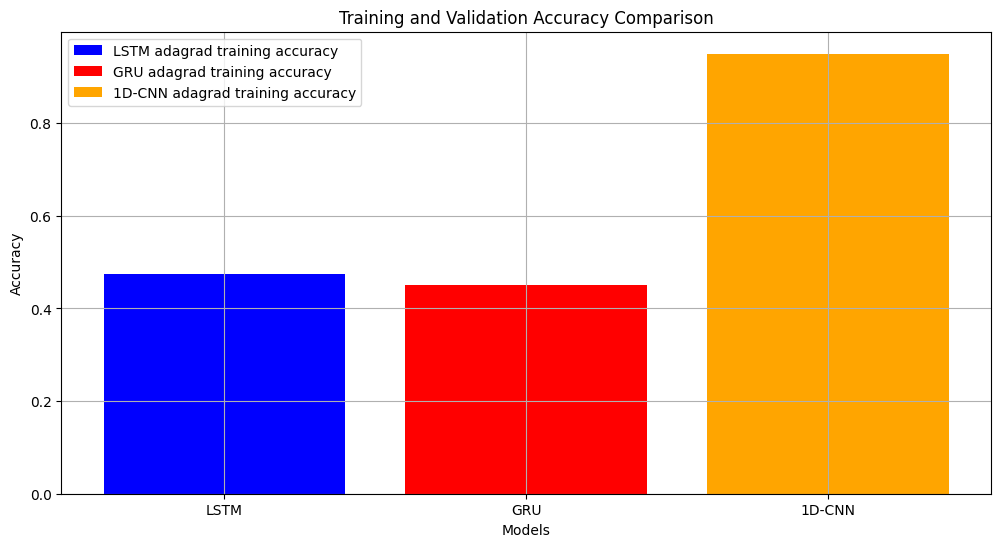

In [119]:
plt.figure(figsize=(12, 6))

# plt.plot(lstm_adagrad_history.history["accuracy"],
#          label="LSTM adagrad training accuracy", color='blue')
# plt.plot(lstm_adagrad_history.history["val_accuracy"],
#          label="LSTM adagrad validation accuracy", color='lightblue')

# plt.plot(gru_adagrad_history.history["accuracy"],
#          label="GRU adagrad training accuracy", color='green')
# plt.plot(gru_adagrad_history.history["val_accuracy"],
#          label="GRU adagrad validation accuracy", color='lightgreen')

# plt.plot(cnn_adagrad_history.history["accuracy"],
#          label="CNN adagrad training accuracy", color='orange')
# plt.plot(cnn_adagrad_history.history["val_accuracy"],
#          label="CNN adagrad validation accuracy", color='gold')

lstm_adagrad_train_acc = np.mean(lstm_adagrad_history.history['accuracy'])
# lstm_adagrad_val_acc = lstm_adagrad_history.history['val_accuracy']

gru_adagrad_train_acc = np.mean(gru_adagrad_history.history['accuracy'])
# gru_adagrad_val_acc = gru_adagrad_history.history['val_accuracy']

cnn_adagrad_train_acc = np.mean(cnn_adagrad_history.history['accuracy'])
# cnn_adagrad_val_acc = cnn_adagrad_history.history['val_accuracy']

# plt.bar(epochs, lstm_adagrad_train_acc, width=bar_width,
#         label="LSTM adagrad training accuracy", color='blue')

# plt.bar([e + 1 * bar_width for e in epochs], gru_adagrad_train_acc,
#         width=bar_width, label="GRU adagrad training accuracy", color='red')

# plt.bar([e + 2 * bar_width for e in epochs], cnn_adagrad_train_acc,
#         width=bar_width, label="CNN adagrad training accuracy", color='orange')

adagrad_accuracies = [lstm_adagrad_train_acc,
                      gru_adagrad_train_acc, cnn_adagrad_train_acc]
plt.bar(models, adagrad_accuracies,  label=['LSTM adagrad training accuracy',
        'GRU adagrad training accuracy', '1D-CNN adagrad training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
# plt.xticks([e + 2 * bar_width for e in epochs], epochs)
plt.legend()
plt.grid(True)
plt.show()


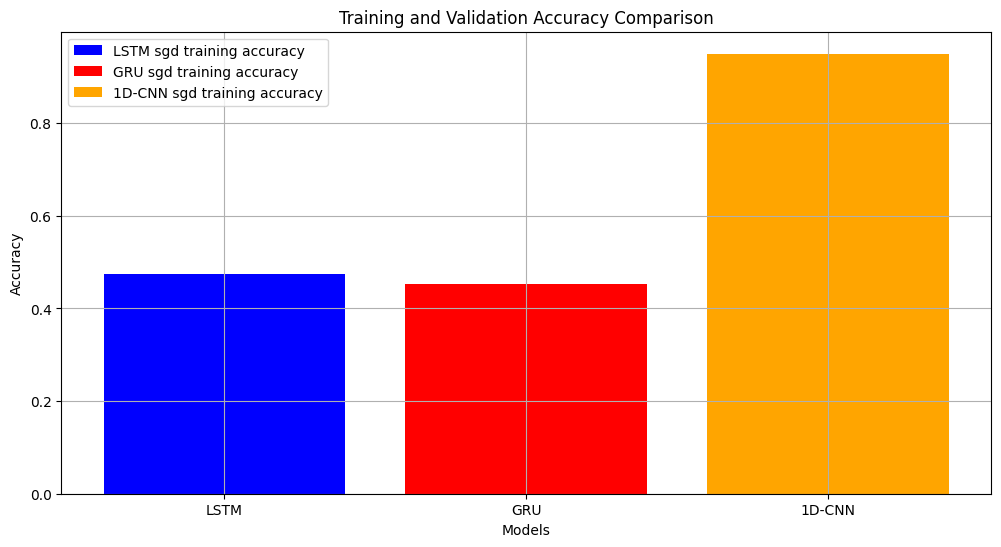

In [120]:
plt.figure(figsize=(12, 6))

lstm_sgd_train_acc = np.mean(lstm_sgd_history.history['accuracy'])

gru_sgd_train_acc = np.mean(gru_sgd_history.history['accuracy'])

cnn_sgd_train_acc = np.mean(cnn_sgd_history.history['accuracy'])

sgd_accuracies = [lstm_sgd_train_acc,
                  gru_sgd_train_acc, cnn_sgd_train_acc]
plt.bar(models, sgd_accuracies,  label=['LSTM sgd training accuracy',
        'GRU sgd training accuracy', '1D-CNN sgd training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


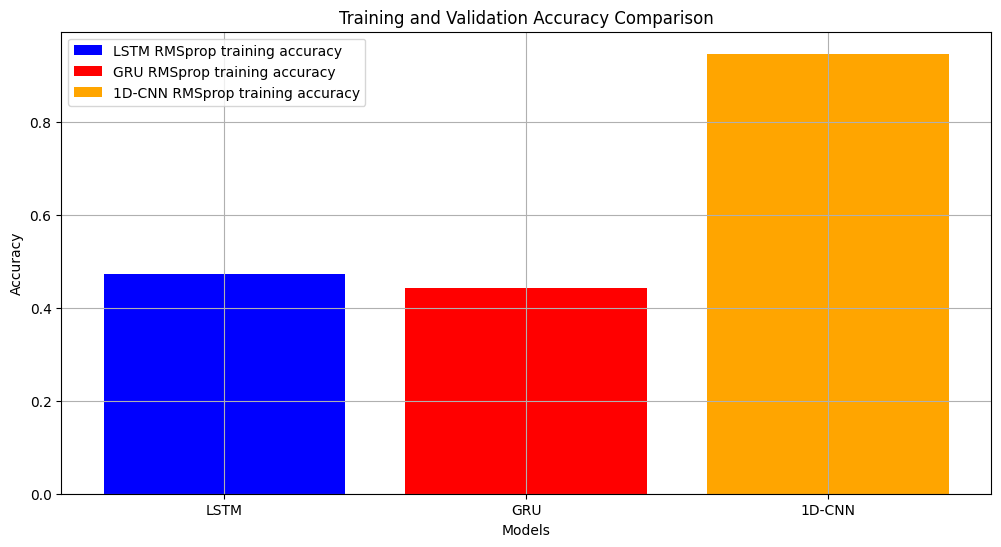

In [121]:
plt.figure(figsize=(12, 6))

lstm_rms_train_acc = np.mean(lstm_rms_history.history['accuracy'])
gru_rms_train_acc = np.mean(gru_rms_history.history['accuracy'])
cnn_rms_train_acc = np.mean(cnn_rms_history.history['accuracy'])

rms_accuracies = [lstm_rms_train_acc, gru_rms_train_acc, cnn_rms_train_acc]

plt.bar(models, rms_accuracies, label=['LSTM RMSprop training accuracy',
        'GRU RMSprop training accuracy', '1D-CNN RMSprop training accuracy'], color=['blue', 'red',  'orange'])

plt.title('Training and Validation Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
